## Importing data

I couldn't find historical data for Borsa Istanbul. I scrape data from web... 

### Scraping data

In [39]:
#import required packages for scraping
import requests
import datetime
import pandas as pd
from datetime import date
from bs4 import BeautifulSoup
from pathlib import Path


#decide start date and end date for scraping
start_date = date(2017,6,15)
end_date = date(2017,9,13)

stocks = []
df = pd.DataFrame()

my_file = Path("bse.csv")

if my_file.is_file():
    df = pd.read_csv("bse.csv")
else:
    for n in range((end_date - start_date).days + 1 ):
        print(start_date)
        if len(stocks) is not 0:
            df = df.append(stocks)
            #Save result of each day to a csv file. 
            df.to_csv("bse.csv")

        stocks.clear()

        for i in range(15):
            url = "http://uzmanpara.milliyet.com.tr/borsa/gecmis-kapanislar/?Pagenum="+str(i)+"&tip=Hisse&gun="+str(start_date.day)+"&ay="+str(start_date.month)+"&yil="+str(start_date.year)+"&Harf=-1"
            r = requests.get(url)
            html_doc = r.text
            soup = BeautifulSoup(html_doc)
            pretty_soup = soup.prettify()
            table = soup.find('table', attrs={'class':'table3 table4'})
            if table is not None:
                table_body = table.find('tbody')
                rows = table_body.find_all('tr')
                for row in rows:
                    cols = row.find_all('td')
                    if len(cols) is not 0:
                        cols = [ele.text.strip() for ele in cols]
                        cols.append(start_date)
                        stocks.append(cols)
        start_date += datetime.timedelta(days=1)

### Preprocessing data

In [24]:
#Inspect our data

df = pd.read_csv("bse.csv")
print(df.shape)
print(df.head())
print(df.tail())
print(df.columns)

(104297, 12)
   Unnamed: 0  Unnamed: 0.1      0      1      2       3      4      5      6  \
0           0             0  ACSEL   3,08   2,72  -10,47   3,45   3,08   3,28   
1           1             1  ADANA   6,26   6,25   -0,15   6,32   6,24   6,26   
2           2             2  ADBGR   4,37   4,38    0,22   4,43   4,33   4,36   
3           3             3   ADEL  15,32  15,50    1,21  15,35  15,14  15,23   
4           4             4  ADESE   1,80   1,84    2,27   1,82   1,76   1,79   

           7        8           9  
0    965.489  3.166,8  2017-01-01  
1     27.378    171,4  2017-01-01  
2      7.054     30,8  2017-01-01  
3     26.801    408,2  2017-01-01  
4  3.409.628  6.103,2  2017-01-01  
        Unnamed: 0  Unnamed: 0.1      0     1     2      3     4     5     6  \
104292       36429           405  YKBNK  4,56  4,44  -2,56  4,71  4,51  4,58   
104293       36430           406  YKGYO  2,45  2,39  -2,39  2,55  2,45  2,47   
104294       36431           407  YUNSA  3,2

In [17]:
df.iloc[1,:]

Unnamed: 0    1,ADANA,"6,26","6,25","-0,15","6,32","6,24","6...
0                                                           NaN
1                                                           NaN
2                                                           NaN
3                                                           NaN
4                                                           NaN
5                                                           NaN
6                                                           NaN
7                                                           NaN
8                                                           NaN
9                                                           NaN
Name: 1, dtype: object

In [ ]:
#Assign column names
df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)
col_names = ["stock","closing","yesterday","change","high","low","w_mean","volume_lot","volume_tl","date"]
df.columns = col_names

In [26]:
#Web page may have multiple entries in the same day for the same stock so drop duplicates
df = df.drop_duplicates()

In [27]:
df

stock   closing yesterday  change      high       low    w_mean  \
0       ACSEL      3,08      2,72  -10,47      3,45      3,08      3,28   
1       ADANA      6,26      6,25   -0,15      6,32      6,24      6,26   
2       ADBGR      4,37      4,38    0,22      4,43      4,33      4,36   
3        ADEL     15,32     15,50    1,21     15,35     15,14     15,23   
4       ADESE      1,80      1,84    2,27      1,82      1,76      1,79   
5       ADNAC      0,81      0,80   -1,18      0,83      0,81      0,81   
6       AEFES     17,63     17,24   -2,16     18,24     17,63     17,95   
7       AFYON      7,91      7,88   -0,38      7,97      7,90      7,93   
8        AGYO      2,60      2,60    0,00      2,63      2,57      2,60   
9       AKBNK      7,82      7,87    0,64      7,84      7,77      0,00   
10      AKCNS     12,46     12,41   -0,36     12,57     12,45     12,47   
11      AKENR      0,85      0,84   -1,16      0,86      0,84      0,85   
12      AKFGY      1,30      1,28   -1,52      1,33      1,30      1,31   
13      AKGRT      2,28      2,27   -0,44      2,30      2,27      2,28   
14      AKGUV      2,38      2,38    0,00      2,40      2,37      2,39   
15      AKMGY     19,81     20,33    2,69     21,16     19,39     20,10   
16      AKPAZ      0,33      0,33    0,00      0,33      0,32      0,33   
17       AKSA      8,32      8,28   -0,43      8,43      8,29      8,35   
18      AKSEL      0,76      0,76    0,00      0,76      0,75      0,75   
19      AKSEN      2,98      2,98    0,00      3,03      2,98      3,00   
20      AKSGY      2,40      2,38   -0,72      2,43      2,37      2,38   
21      AKSUE      8,65      8,88    2,73      9,20      8,40      8,87   
22      ALARK      4,33      4,32   -0,23      4,38      4,32      4,34   
23      ALBRK      1,19      1,17   -1,65      1,21      1,18      1,19   
24      ALCAR     37,84     37,98    0,37     37,96     37,66     37,82   
25      ALCTL      6,78      6,99    3,20      6,82      6,57      6,72   
26      ALGYO     37,52     39,00    4,11     37,66     35,66     36,88   
27       ALKA      2,56      2,56    0,00      2,67      2,50      2,57   
28      ALKIM     18,02     18,44    2,39     18,31     17,72     18,02   
29      ALYAG      0,88      0,88    0,00      0,89      0,87      0,88   
...       ...       ...       ...     ...       ...       ...       ...   
104267  UNYEC      4,35      4,34   -0,23      4,40      4,34      4,37   
104268   USAK      2,93      2,91   -0,68      2,98      2,91      2,94   
104269   USAS      0,62      0,60   -3,13      0,64      0,62      0,63   
104270  USDTR    332,60    332,90    0,09    333,10    331,70    332,38   
104271  UTPYA      4,73      5,05    7,26      4,75      4,45      4,66   
104272  UZERB      1,07      1,07    0,00      1,10      1,07      1,10   
104273  VAKBN      6,72      6,59   -1,90      6,86      6,60      6,70   
104274  VAKFN      2,07      2,03   -1,90      2,12      2,06      2,08   
104275  VAKKO      3,83      3,75   -2,05      3,93      3,82      3,86   
104276  VANGD      2,03      2,03    0,00      2,06      2,02      2,03   
104277  VERTU      2,51      2,48   -1,18      2,57      2,50      2,52   
104278  VERUS     14,99     15,04    0,33     15,02     14,84     14,92   
104279  VESBE     11,04     10,99   -0,45     11,16     11,04     11,11   
104280  VESTL      8,51      8,47   -0,47      8,77      8,51      8,66   
104281  VKFYO      1,56      1,56    0,00      1,57      1,54      1,55   
104282  VKGYO      3,05      2,97   -2,56      3,16      3,05      3,10   
104283  VKING      1,04      1,01   -2,80      1,06      1,02      1,05   
104284  YAPRK      2,84      2,81   -1,05      2,86      2,84      2,85   
104285  YATAS     17,00     17,81    5,00     17,17     16,37     16,89   
104286  YAYLA      2,64      2,66    0,76      2,64      2,60      2,61   
104287  YAZIC     22,20     21,96   -1,07     22,54     22,16     22,35   
104288  YBTAS  1.760,00  1.760,00

In [28]:
#We'll work with the change column so correct digit issue and convert to numeric
df["change"] = df["change"].str.replace(",",".")

for index,row in df.change.iteritems():
    if df.change[index].count(".")>1:
        i = df.change[index].find(".")
        df.change[index] = df.change[index][:i]+df.change[index][(i+1):]

df["change"] = pd.to_numeric(df["change"])

In [29]:
# Parse date column
df["date"] = pd.to_datetime(df["date"],format="%Y-%m-%d")

In [30]:
# Transform table from long to wide format
df_wide = df.pivot_table(index="stock",columns="date",values="change")

#Drop any stock which is not traded every day
df_wide.dropna(axis=0,how="any",inplace=True)

## Clustering

In [31]:
# Importing packages for clustering
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

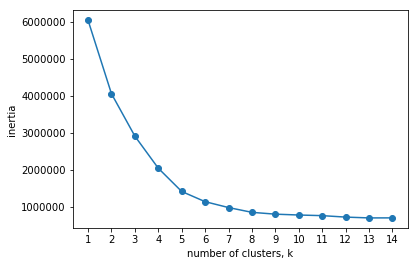

In [33]:
# Deciding how many clusters we need

ks = range(1, 15)
inertias = []

movements = df_wide.reset_index(drop=True).values.tolist()
companies = df_wide.reset_index(drop=False).stock

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(movements)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Inertia reduces marginally after 8 clusters so we may choose 8 for n_clusters parameter

In [34]:
#Create pipeline for Kmeans and fit model

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=8)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)



pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [35]:
# Predict labels
labels = pipeline.predict(movements)

In [36]:
# Create a DataFrame aligning labels and companies: df
df_predictions = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df_predictions.sort_values("labels"))

    companies  labels
94      DARDL       0
86      CMBTN       0
289     SANEL       0
80      CCOLA       0
76      BTCIM       0
73      BRSAN       0
300      SISE       0
67      BOSSA       0
310     TATGD       0
54      BAGFS       0
311     TAVHL       0
313     TCELL       0
50      AVTUR       0
43      ATEKS       0
42      ATAGY       0
323     TRCAS       0
277     PRKAB       0
100     DESPC       0
113      DOCO       0
252     NUGYO       0
204     KARTN       0
166     GUBRF       0
165     GSRAY       0
209     KERVT       0
159     GOLTS       0
213     KLNMA       0
149     GARFA       0
325     TRKCM       0
225     KRTEK       0
144     FENER       0
..        ...     ...
349     VERUS       7
251     NTTUR       7
200     JANTS       7
303     SNGYO       7
334     TURGG       7
240     METUR       7
145     FINBN       7
152     GENTS       7
74      BRYAT       7
294     SAYAS       7
138     ETILR       7
78      BURCE       7
79      BURVA       7
314     TE